In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM

In [15]:
# training data
pp = np.load('../Task3/Task3/perfect_patches.npy')
dp = np.load('../Task3/Task3/defect_patches.npy')

# test data
graphene = np.load('../Task3/Task3/full-stack.npy')

# data set of 50/50 perfect to imperfect images
patches = np.concatenate([pp, dp])  # matrices
gt = np.concatenate([np.zeros(len(pp)), np.ones(len(dp))])  # labels

# split training and test data
X_train, X_test, y_train, y_test = train_test_split(
    patches,
    gt,
    test_size=0.2,
    shuffle=True,
)

# transform x_train
nsamples, nx, ny = X_train.shape
X_train_transformed = X_train.reshape((nsamples, nx * ny))

# transform x_test
nsamples, nx, ny = X_test.shape
X_test_transformed = X_test.reshape((nsamples, nx * ny))

[0. 0. 0. ... 1. 1. 1.]


In [16]:
# SVM attempt 1
ratio = len(dp) / (len(pp) + len(dp))
clf = OneClassSVM(gamma="auto", nu=ratio)
y_pred = clf.fit_predict(X_train_transformed)
clf.decision_function(X_train_transformed)

array([0.00931422, 0.06888319, 0.0368489 , ..., 0.02138025, 0.07854724,
       0.10272958])

38


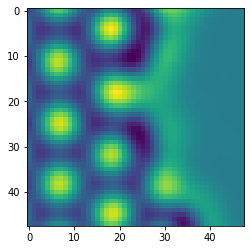

In [17]:
# translate y labels from 0 -> 1 and 1 -> -1
y_train_translated = np.copy(y_train)
y_train_translated[y_train_translated == 1] = -1
y_train_translated[y_train_translated == 0] = 1

# get outliers
y_outliers = y_train_translated[y_train_translated != y_pred]
print(len(y_outliers))

# get indices of outliers
indicies = []
for i, y_val in enumerate(y_pred):
    if y_val != y_train_translated[i]:
        indicies.append(i)

# show all incorrectly assigned images
for i in indicies:
    plt.imshow(X_train[i])

In [18]:
print('Percentage correct: ', 100 * np.sum(y_pred == y_train_translated) / len(y_pred))

Percentage correct:  97.94372294372295


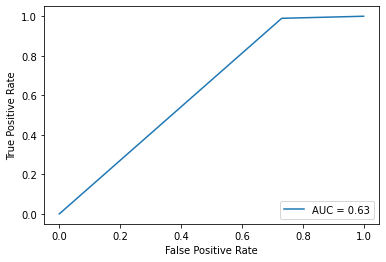

In [19]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, thresholds = roc_curve(y_train_translated, y_pred)
roc_auc = auc(fpr, tpr)
roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc.plot()

In [29]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=3)
results =cross_val_score(clf ,X_train_transformed,y_train_translated, scoring="roc_auc")
print(results)

[0.30191257 0.2511542  0.75751366 0.14315068 0.22802198]
